# Exploring the California Middle School Dataset
What metrics can predict higher achievement on the SBAC test? 

In [2]:
import pandas as pd # pandas is a data analytics package for python
import matplotlib.pyplot as plt # matplotlib is a graphing package for python
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = (10.0, 5.0)

First, let's import the processed data for middle schools only. We're examining 10 features, which include: <br><br>
1) enrollment <br>
2) charter school status <br> 
3) percent of students receiving free lunch <br>
4) percent of students receiving free and reduced lunch <br>
5) ratio of students to teachers <br>
6) ratio of students to administrators <br>
7) average years of experience of teachers <br>
8) average years teachers remain in the district<br>
9) number of suspensions per enrollment <br>
10) district spending per student 

In [3]:
df = pd.read_csv('middle_school.csv')
df.head(n=5) # read the first five rows

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0,A. G. Currie Middle,ela,776,False,0.832,0.951,23.310303,388.000000,10,6,0.146907,4589.215093,0.370198
1,A. G. Currie Middle,math,776,False,0.832,0.951,23.310303,388.000000,10,6,0.146907,4589.215093,0.172368
2,A. M. Thomas Middle,ela,170,False,0.941,0.959,15.315315,89.473684,14,12,0.000000,6841.925884,0.137706
3,A. M. Thomas Middle,math,170,False,0.941,0.959,15.315315,89.473684,14,12,0.000000,6841.925884,0.092353
4,Abbott Middle,ela,808,False,0.322,0.371,22.088573,808.000000,12,9,0.028465,5244.973988,0.518384


To standarize the data, let's focus on math scores only. 

In [4]:
df = df[df['test_id'] == "math"]
print "Number of schools in the dataset:", len(df.index) # count number of schools

Number of schools in the dataset: 923


## Majority High-Income Schools vs Majority Low-Income Schools

How do schools services high-income families SBAC scores correlate with those typically servicing low-income families? 

In [5]:
df_frgrouped = df.groupby(pd.cut(df['fr_percent'], [0, 0.25, 0.5, 0.75, 1])).mean()
df_frgrouped.index = [.125, .375, .625, .875]
df_frgrouped.head(n=4)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0.125,911.971831,0.070423,0.097352,0.125993,22.227607,396.006871,13.450704,10.267606,0.017230,5392.915213,0.645290
0.375,782.365269,0.137725,0.297401,0.380455,21.975886,368.430911,13.143713,10.556886,0.047566,4531.586484,0.452889
0.625,734.857820,0.052133,0.507725,0.624801,21.416025,346.922933,12.436019,10.379147,0.086346,5016.148791,0.315917
0.875,671.258065,0.210918,0.780561,0.882243,20.861634,293.566746,11.183623,9.265509,0.093232,5410.920815,0.200379


We observe that: <br>
1) Low income schools, with an average of 636 students, tend to have a lower enrollment than high income schools, who average 912 students.  <br>
2) Low income schools have a marginally lower student to teacher ratio than high income schools, but have a more significantly lower student to admin ratio. <br> 
3) Low income schools have signficantly more suspensions than high income schools. There are roughly 8 times more suspensions per student at low-income schools (75-100% free and reduced lunch percent) than at high-income schools (0-25% free and reduced lunch). <br>
4) Low income schools have significantly lower test scores than high income schools. A student at a high-income school is 3 times more likely to pass the SBAC than those at low-income schools. 

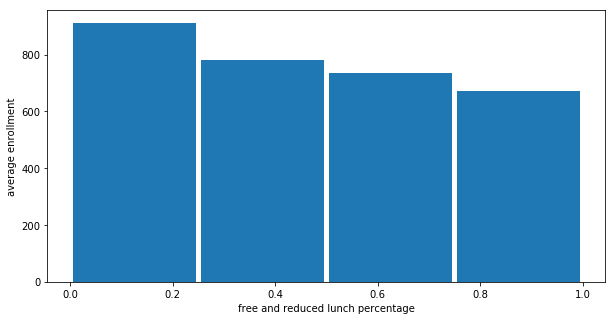

In [6]:
plt.bar(df_frgrouped.index, df_frgrouped['enrollment'], align='center', width = 0.24, alpha=1)
plt.ylabel('average enrollment')
plt.xlabel('free and reduced lunch percentage')
plt.show()

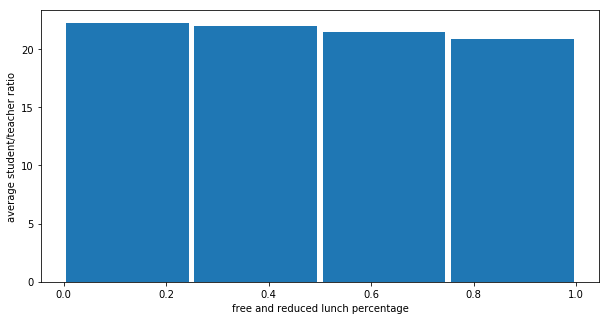

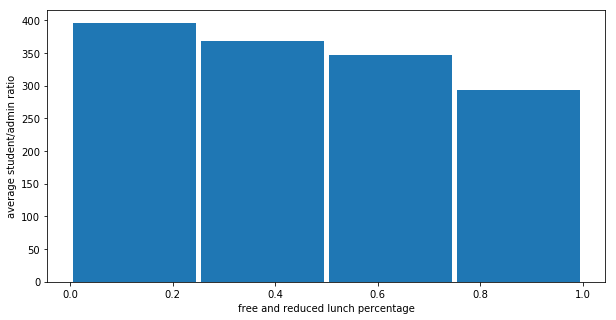

In [7]:
plt.bar(df_frgrouped.index, df_frgrouped['student_teacher_ratio'], align='center', width = 0.24, alpha=1)
plt.ylabel('average student/teacher ratio')
plt.xlabel('free and reduced lunch percentage')
plt.show()
plt.bar(df_frgrouped.index, df_frgrouped['student_admin_ratio'], align='center', width = 0.24, alpha=1)
plt.ylabel('average student/admin ratio')
plt.xlabel('free and reduced lunch percentage')
plt.show()

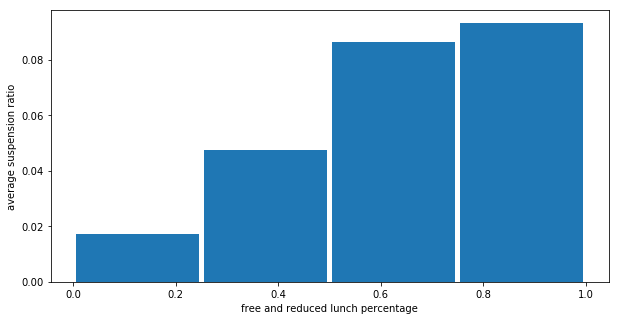

In [8]:
plt.bar(df_frgrouped.index, df_frgrouped['susp_per_enrollment'], align='center', width = 0.24, alpha=1)
plt.ylabel('average suspension ratio')
plt.xlabel('free and reduced lunch percentage')
plt.show()

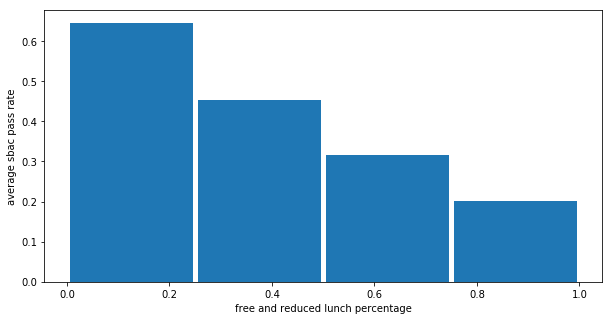

In [9]:
plt.bar(df_frgrouped.index, df_frgrouped['percent_met_and_above'], align='center', width = 0.24, alpha=1)
plt.ylabel('average sbac pass rate')
plt.xlabel('free and reduced lunch percentage')
plt.show()

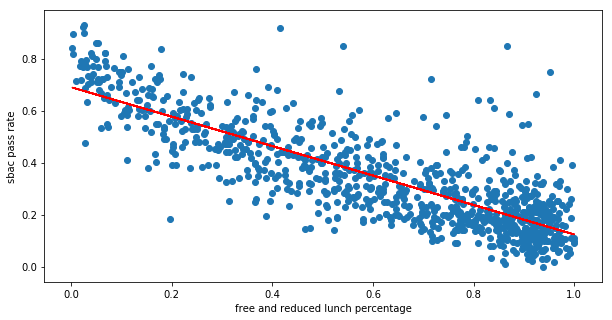

In [10]:
x = df['fr_percent']
y = df['percent_met_and_above']
plt.scatter(x,y)
plt.ylabel('sbac pass rate')
plt.xlabel('free and reduced lunch percentage')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

## Charter Schools vs Non-Charter Schools

How do charter schools perform on standarized test compared to non-charters? 

In [11]:
charter_pass = df[df['charter'] == True]['percent_met_and_above'].mean() # percent of students passing the SBAC in charter schools
print(charter_pass)

0.313165083738


In [12]:
noncharter_pass = df[df['charter'] == False]['percent_met_and_above'].mean() # percent of students passing the SBAC in charter schools
print(noncharter_pass)

0.345436442637


Looks like non-charter middle schools in California have a slightly higher pass rate than charter schools. However, we may need to account for the differences in poverty between charter and non-charter schools. As shown by the graph below, charter schools usually service majority low-income families while non-charter schools have a more even distribution of 

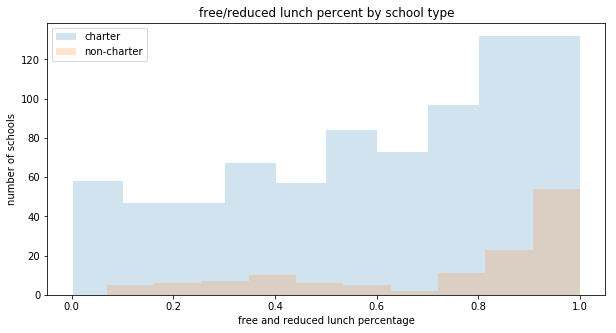

Average free and reduced lunch percentage at charter schools is: 0.73611627907
Average free and reduced lunch percentage at noncharter schools is: 0.596782115869


In [13]:
df_charter = df[df['charter'] == True]
df_noncharter = df[df['charter'] == False]
plt.figure()
df_noncharter['fr_percent'].plot.hist(alpha=0.2, label = 'charter')
df_charter['fr_percent'].plot.hist(alpha=0.2, label = 'non-charter')
plt.title('free/reduced lunch percent by school type')
plt.xlabel('free and reduced lunch percentage')
plt.ylabel('number of schools')
plt.legend()
plt.show()
print "Average free and reduced lunch percentage at charter schools is:", df_charter['fr_percent'].mean()
print "Average free and reduced lunch percentage at noncharter schools is:", df_noncharter['fr_percent'].mean()

In [14]:
df_charter = df_charter.reset_index(drop = True) 
df_frgrouped_charter = df_charter.groupby(pd.cut(df_charter['fr_percent'], [0, 0.25, 0.5, 0.75, 1])).mean()
df_frgrouped_charter.index = ['0-25%', '25-50%', '50-75%', '75-100%']
df_frgrouped_charter.head(n=4)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0-25%,605.400000,True,0.131900,0.167600,21.570998,339.576362,11.500000,7.400000,0.015142,4196.839384,0.557808
25-50%,590.043478,True,0.288739,0.380913,21.592104,260.301860,11.608696,8.652174,0.025339,4167.539624,0.442115
50-75%,371.636364,True,0.477545,0.630364,22.286901,267.960317,8.363636,4.181818,0.036498,5278.811442,0.414363
75-100%,305.505882,True,0.806424,0.912800,21.930223,154.600305,5.000000,1.976471,0.041124,5570.570189,0.236395


In [15]:
df_noncharter = df_noncharter.reset_index(drop = True) 
df_frgrouped_noncharter = df_noncharter.groupby(pd.cut(df_noncharter['fr_percent'], [0, 0.25, 0.5, 0.75, 1])).mean()
df_frgrouped_noncharter.index = ['0-25%', '25-50%', '50-75%', '75-100%']
df_frgrouped_noncharter.head(n=4)

,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above
0-25%,935.196970,False,0.094735,0.122841,22.277350,400.347679,13.598485,10.484848,0.017388,5483.527018,0.651918
25-50%,813.083333,False,0.298785,0.380382,22.037185,385.302111,13.388889,10.861111,0.051116,4589.732858,0.454610
50-75%,754.835000,False,0.509385,0.624495,21.368127,350.548767,12.660000,10.720000,0.089087,5001.702345,0.310502
75-100%,769.022013,False,0.773648,0.874075,20.576005,326.972141,12.836478,11.213836,0.107160,5368.247240,0.190752


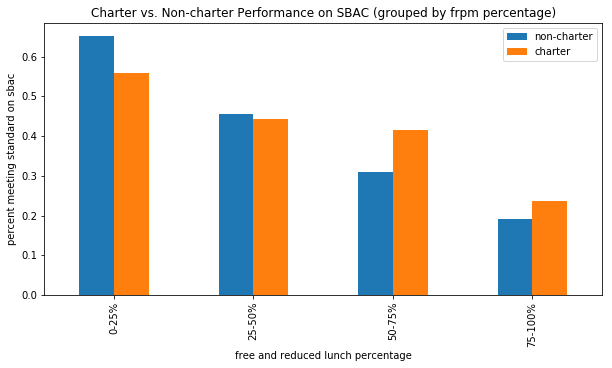

In [18]:
feature = 'percent_met_and_above'
df_feature = pd.concat([df_frgrouped_noncharter[feature], df_frgrouped_charter[feature]], axis = 1)
df_feature.columns = ['non-charter', 'charter']
df_feature.plot.bar()
plt.xlabel('free and reduced lunch percentage')
plt.ylabel('percent meeting standard on sbac')
plt.title('Charter vs. Non-charter Performance on SBAC (grouped by frpm percentage)')
plt.show()

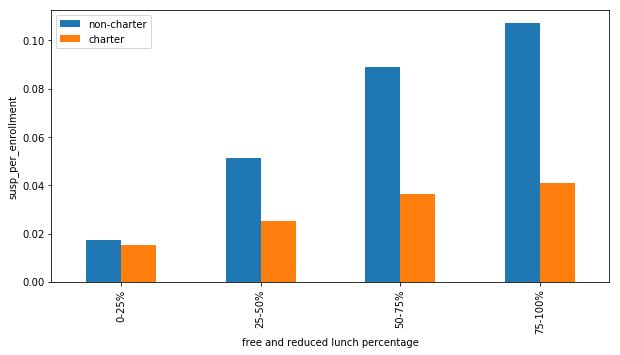

In [16]:
feature = 'susp_per_enrollment'
df_feature = pd.concat([df_frgrouped_noncharter[feature], df_frgrouped_charter[feature]], axis = 1)
df_feature.columns = ['non-charter', 'charter']
df_feature.plot.bar()
plt.xlabel('free and reduced lunch percentage')
plt.ylabel(feature)
plt.show()

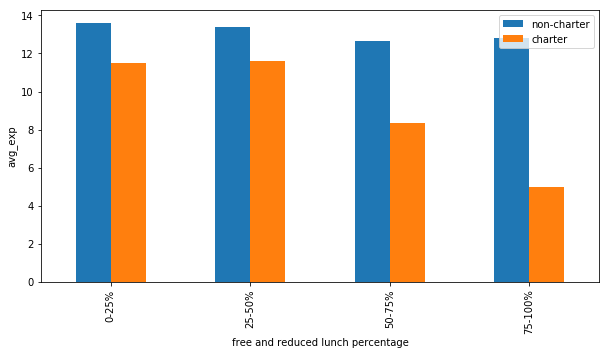

In [17]:
feature = 'avg_exp'
df_feature = pd.concat([df_frgrouped_noncharter[feature], df_frgrouped_charter[feature]], axis = 1)
df_feature.columns = ['non-charter', 'charter']
df_feature.plot.bar()
plt.xlabel('free and reduced lunch percentage')
plt.ylabel(feature)
plt.show()

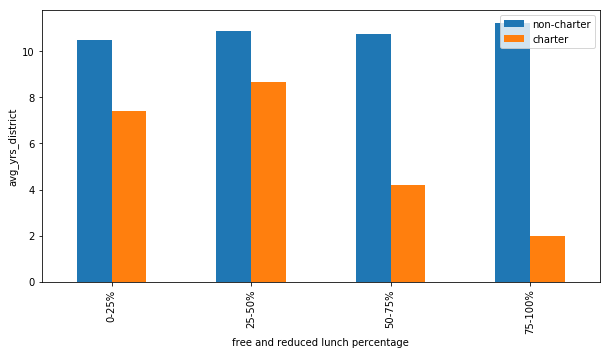

In [18]:
feature = 'avg_yrs_district'
df_feature = pd.concat([df_frgrouped_noncharter[feature], df_frgrouped_charter[feature]], axis = 1)
df_feature.columns = ['non-charter', 'charter']
df_feature.plot.bar()
plt.xlabel('free and reduced lunch percentage')
plt.ylabel(feature)
plt.show()

## Examining Multivariable Correlation

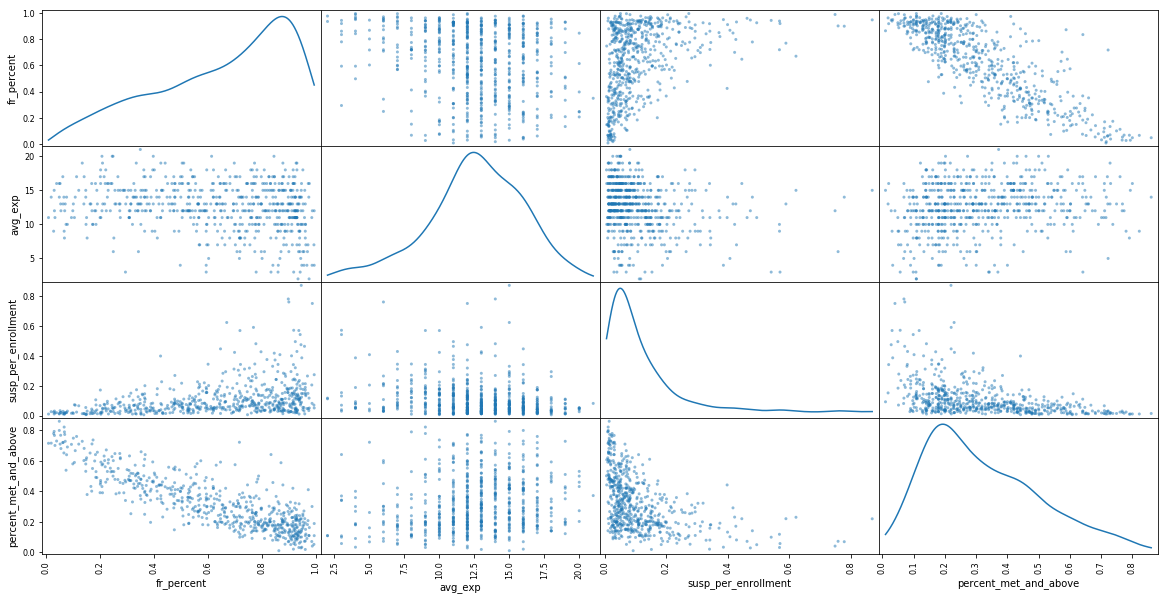

In [19]:
df_multivariate = df[df['susp_per_enrollment'] <1]
df_multivariate = df_multivariate[df_multivariate['susp_per_enrollment'] >0]
plt.rcParams['figure.figsize'] = (20.0, 10.0)
pd.plotting.scatter_matrix(df_multivariate.loc[:, ["fr_percent","avg_exp", "susp_per_enrollment","percent_met_and_above"]], diagonal="kde")
plt.show()

## Applying Machine Learning Techniques

In [22]:
df['sbac_quantile'] = pd.qcut(df['percent_met_and_above'], 4, labels=False)
df.head(n=5)

,school_name,test_id,enrollment,charter,f_percent,fr_percent,student_teacher_ratio,student_admin_ratio,avg_exp,avg_yrs_district,susp_per_enrollment,district_budget_per_student,percent_met_and_above,sbac_quantile
1,A. G. Currie Middle,math,776,False,0.832,0.951,23.310303,388.000000,10,6,0.146907,4589.215093,0.172368,0
3,A. M. Thomas Middle,math,170,False,0.941,0.959,15.315315,89.473684,14,12,0.000000,6841.925884,0.092353,0
5,Abbott Middle,math,808,False,0.322,0.371,22.088573,808.000000,12,9,0.028465,5244.973988,0.378417,2
7,Acacia Middle,math,746,False,0.808,0.909,20.162162,248.666667,14,10,0.399464,5467.402490,0.131809,0
9,Acacia Middle Charter,math,127,True,0.780,0.858,36.285714,63.500000,10,2,0.000000,2247.923312,0.021504,0


In [23]:
df_dec_tree = df.drop('f_percent', 1)
df_dec_tree = df_dec_tree.drop('percent_met_and_above', 1)
df_dec_tree = df_dec_tree.dropna()
df_dec_tree['charter'] = df_dec_tree['charter'].astype(int)

In [24]:
features = list(df_dec_tree.columns[2:-1])
y = df_dec_tree['sbac_quantile']
X = df_dec_tree[features]

depth = 1
best_depth = 1
best_accuracy = 0 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
while depth < 10: 
    dt = DecisionTreeClassifier(max_depth = depth, random_state=99)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    cur_accuracy_score = accuracy_score(y_test,y_pred)
    if cur_accuracy_score > best_accuracy: 
        best_accuracy = cur_accuracy_score
        best_depth = depth
    depth = depth + 1 

print "Best depth is", best_depth, "with accuracy", best_accuracy


Best depth is 7 with accuracy 0.558659217877


In [26]:
dt = DecisionTreeClassifier(max_depth = 2, random_state=99)
dt.fit(X_train, y_train)
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("tree.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
visualize_tree(dt, features)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

depth = 0
best_depth = 1
n = 5
best_estimators = 5
best_accuracy = 0 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
while depth < 10: 
    n = 5
    depth = depth + 1 
    while n < 21: 
        rf = RandomForestClassifier(n_estimators = n , max_depth = depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        cur_accuracy_score = accuracy_score(y_test,y_pred)
        if cur_accuracy_score > best_accuracy: 
            best_accuracy = cur_accuracy_score
            best_depth = depth
            best_estimators = n
        n += 1

print "Best depth is", best_depth, "and best n-estimators is", best_estimators, "with accuracy", best_accuracy
print features 
print rf.feature_importances_ 

## So free and reduced lunch percentage is the best predictor of SBAC scores. What low-income schools tend to be most successful? 

In [ ]:
df_dec_tree_l = df[df['fr_percent'] > 0.7]
df_dec_tree_l = df_dec_tree_l.drop('f_percent', 1)
df_dec_tree_l = df_dec_tree_l.drop('fr_percent', 1)
df_dec_tree_l = df_dec_tree_l.drop('sbac_quantile', 1)
df_dec_tree_l['sbac_quantile'] = pd.qcut(df_dec_tree_l['percent_met_and_above'], 2, labels=False)
df_dec_tree_l = df_dec_tree_l.dropna()
df_dec_tree_l['charter'] = df_dec_tree_l['charter'].astype(int)
df_dec_tree_l.head(n=5)

In [ ]:
features = list(df_dec_tree_l.columns[2:-2])
y = df_dec_tree_l['sbac_quantile']
X = df_dec_tree_l[features]

depth = 1
best_depth = 1
best_accuracy = 0 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
while depth < 10: 
    dt = DecisionTreeClassifier(max_depth = depth, random_state=99)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    cur_accuracy_score = accuracy_score(y_test,y_pred)
    if cur_accuracy_score > best_accuracy: 
        best_accuracy = cur_accuracy_score
        best_depth = depth
    depth = depth + 1 

print "Best depth is", best_depth, "with accuracy", best_accuracy


In [ ]:
dt = DecisionTreeClassifier(max_depth = best_depth, random_state=99)
dt.fit(X_train, y_train)
visualize_tree(dt, features)
print features
print dt.feature_importances_

In [ ]:
depth = 0
best_depth = 1
n = 5
best_estimators = 5
best_accuracy = 0 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
while depth < 10: 
    n = 5
    depth = depth + 1 
    while n < 21: 
        rf = RandomForestClassifier(n_estimators = n , max_depth = depth)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        cur_accuracy_score = accuracy_score(y_test,y_pred)
        if cur_accuracy_score > best_accuracy: 
            best_accuracy = cur_accuracy_score
            best_depth = depth
            best_estimators = n
        n += 1

print "Best depth is", best_depth, "and best n-estimators is", best_estimators, "with accuracy", best_accuracy
rf = RandomForestClassifier(n_estimators = best_estimators, max_depth = best_depth)
rf.fit(X_train, y_train)
print features 
print rf.feature_importances_ 